Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 12, 32)            96        
                                                                 
 batch_normalization_4 (Bat  (None, 12, 32)            128       
 chNormalization)                                                
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 6, 32)             0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 5, 64)             4160      
                                                                 
 batch_normalization_5 (Bat  (None, 5, 64)             256       
 chNormalization)                                                
                                                      

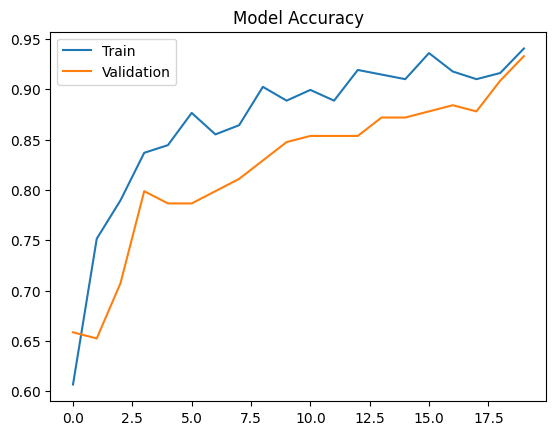

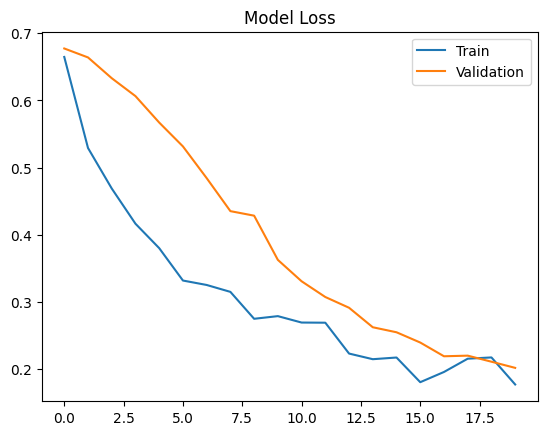

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv("heart.csv")

X = df.drop("target", axis=1).values
y = df["target"].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = np.expand_dims(X, axis=-1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = models.Sequential([
    layers.Input(shape=(X_train.shape[1], 1)),

    layers.Conv1D(32, 2, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(2),

    layers.Conv1D(64, 2, activation='relu'),
    layers.BatchNormalization(),

    layers.GlobalAveragePooling1D(),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),

    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=8,
    restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc:.4f}")

print("\nFinal Train Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])

y_pred = (model.predict(X_test) > 0.5).astype(int)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Validation'])
plt.show()